In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'HarmonicOscillator1D_HighFreq'
# test_name = 'Heat_Eq_1+1D'

test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_128',
 'CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_128',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_64',
 'CKAN_A_8',
 'FCN_128',
 'FCN_32',
 'FCN_8',
 'FCN_A_128',
 'FCN_A_32',
 'FCN_A_8',
 'LKAN_128',
 'LKAN_16',
 'LKAN_32',
 'LKAN_64',
 'LKAN_8',
 'LKAN_A_128',
 'LKAN_A_16',
 'LKAN_A_32',
 'LKAN_A_64',
 'LKAN_A_8']

In [4]:
analyser = RunAnalyser(runs, test_path)

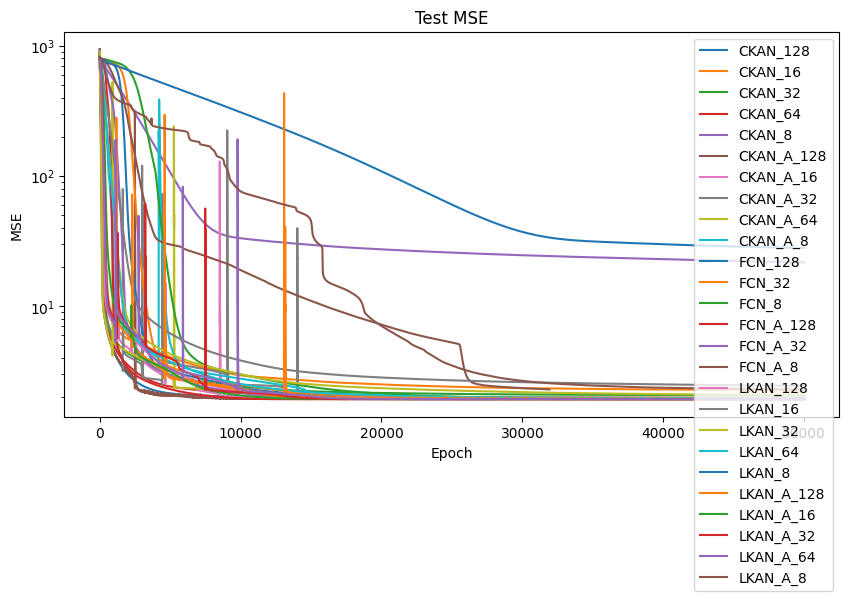

Late stage variances:
CKAN_128: 0.0007
CKAN_16: 0.0010
CKAN_32: 0.0006
CKAN_64: 0.0004
CKAN_8: 0.0079
CKAN_A_128: 0.0021
CKAN_A_16: 0.0001
CKAN_A_32: 0.0001
CKAN_A_64: 0.0005
CKAN_A_8: 0.0003
FCN_128: 0.0005
FCN_32: 0.0001
FCN_8: 0.0004
FCN_A_128: nan
FCN_A_32: nan
FCN_A_8: nan
LKAN_128: 0.0002
LKAN_16: 0.0036
LKAN_32: 0.0016
LKAN_64: 0.0003
LKAN_8: 0.0079
LKAN_A_128: 0.0022
LKAN_A_16: 0.0000
LKAN_A_32: 0.0000
LKAN_A_64: 0.0002
LKAN_A_8: 0.0036


In [5]:
# Plot all models
analyser.plot_mses()
analyser.print_late_variances()

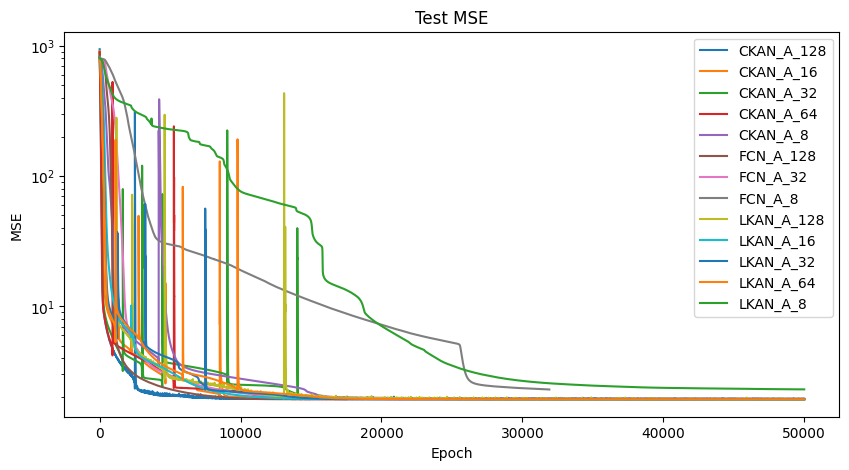

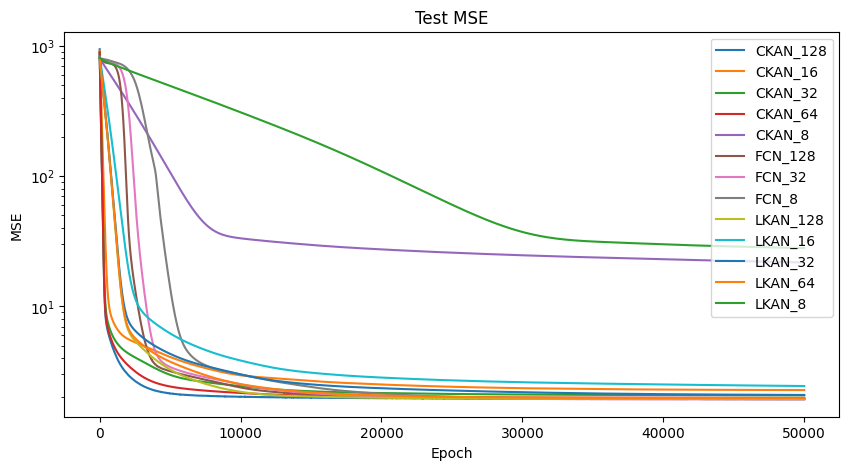

(None, None)

In [6]:
analyser.plot_mses(filter=adaptive_filter), analyser.plot_mses(filter=non_adaptive_filter)

# Non-adaptive analysis

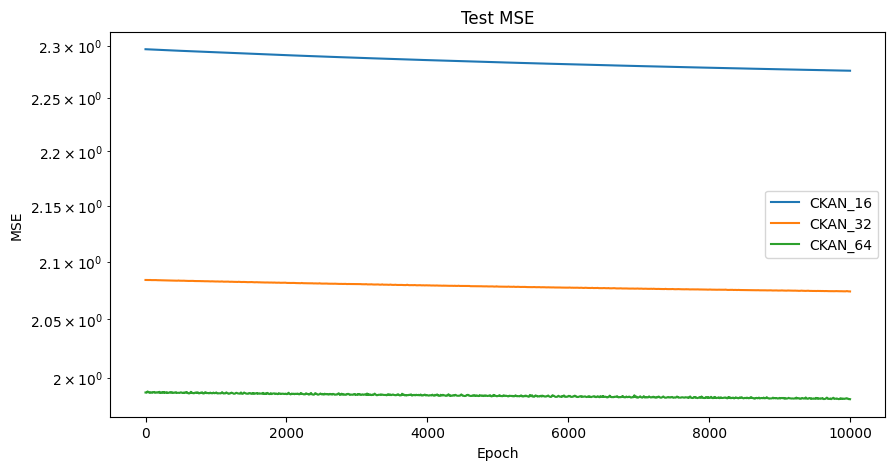

In [ ]:
non_adaptive_ckans = lambda x: model_filter(x, 'CKAN') and non_adaptive_filter(x) and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=non_adaptive_ckans, start=40000)

CKAN_64 is best, 16, 32 are comparable

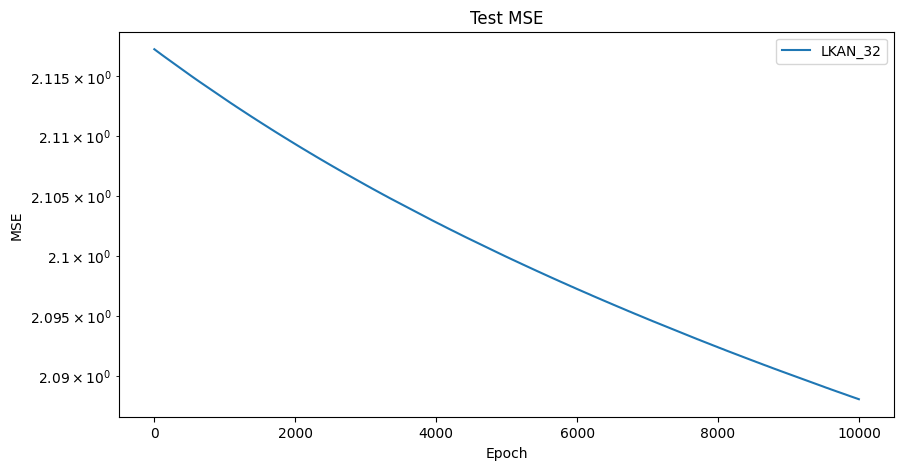

Mean absolute changes:
LKAN_32: 0.0000


In [ ]:
non_adaptive_lkans = lambda x: model_filter(x, 'LKAN') and non_adaptive_filter(x) and ('_32' in x )#or '_16' in x
analyser.plot_mses(filter=non_adaptive_lkans, start=40000)
analyser.print_mean_absolute_change(filter=non_adaptive_lkans, start=40000)

Same as CKAN

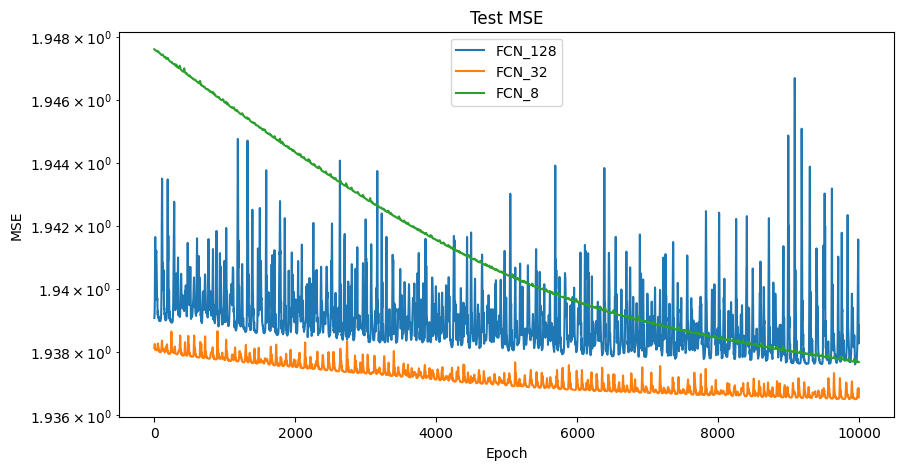

Mean absolute changes:
FCN_128: 0.0001
FCN_32: 0.0000
FCN_8: 0.0000


In [9]:
non_adaptive_fcns = lambda x: model_filter(x, 'FCN') and non_adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=non_adaptive_fcns, start=40000)
analyser.print_mean_absolute_change(filter=non_adaptive_fcns, start=40000)

FCN 32 is best but 8 is still reducing

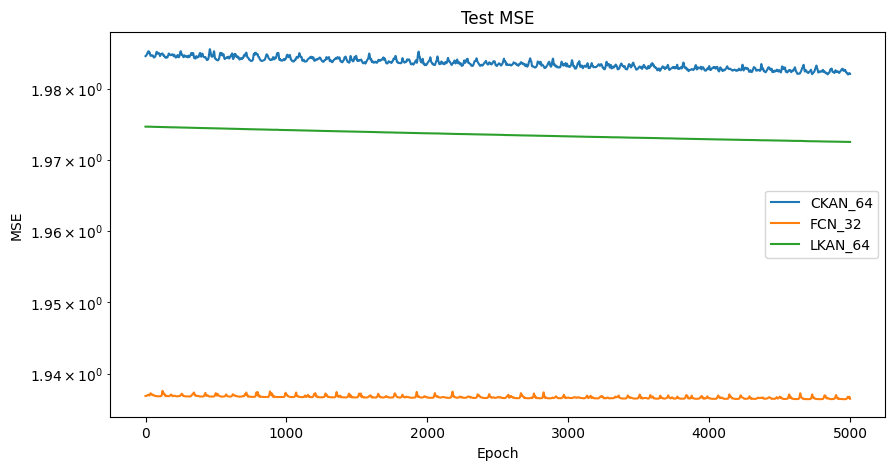

In [18]:
d = ['FCN_32', 'CKAN_64', 'LKAN_64']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=45000)

all models are essentially equal

# Adaptive analysis

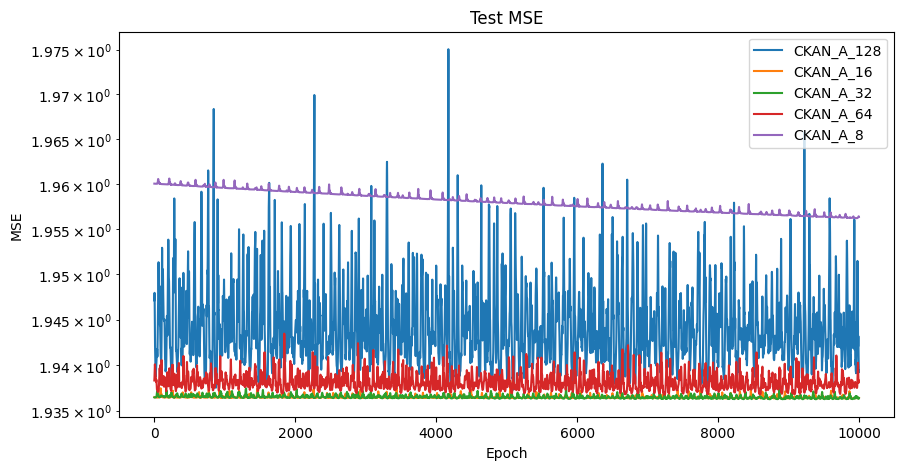

In [ ]:
adaptive_ckans = lambda x: model_filter(x, 'CKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=adaptive_ckans, start=40000)

32 is best, 16 and 64 are also good, 8 is also impressive for model size

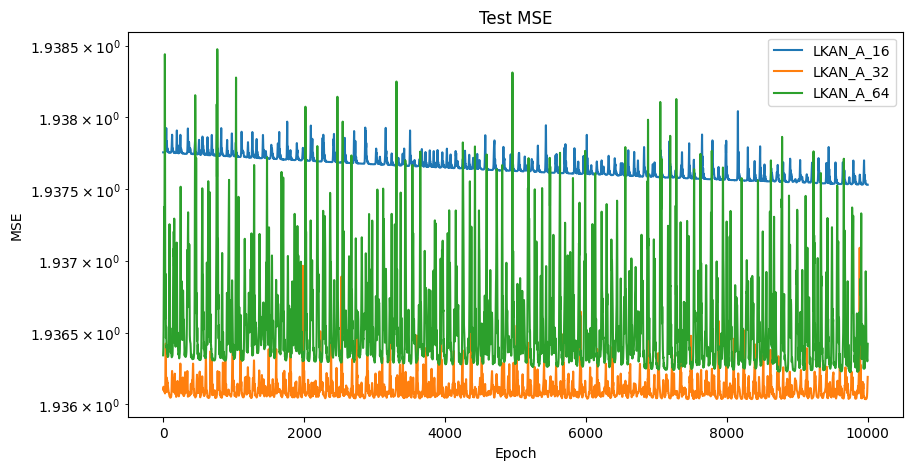

In [23]:
adaptive_lkans = lambda x: model_filter(x, 'LKAN') and adaptive_filter(x) and '_128' not in x and '_8' not in x #  and '_8' not in x
analyser.plot_mses(filter=adaptive_lkans, start=40000)

32 and 64 are best

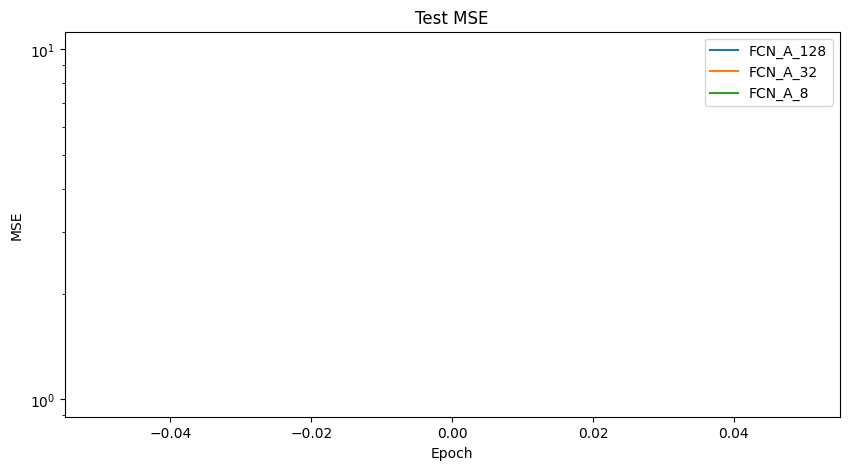

In [25]:
adaptive_fcns = lambda x: model_filter(x, 'FCN') and adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=adaptive_fcns, start=40000)

became NAN

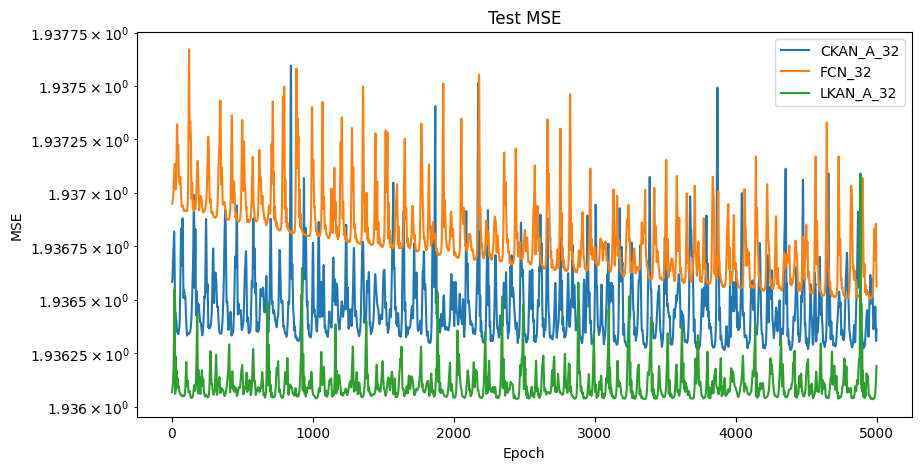

In [26]:
d = ['FCN_32', 'CKAN_A_32', 'LKAN_A_32']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=45000)

all models are even more equal. perform parameter count analysis